In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [7]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(X_proj, y, test_size=0.10, random_state=0)

In [3]:
class LDA:
    def __init__(self,feat):
        self.feat = feat
        self.linear = None

    def fit(self, X, y):
        feat = X.shape[1] #number of features 150,4
        
        labels = np.unique(y)
        
        #class within = inner_class
        #class between = outer_class
        mean = np.mean(X, axis=0)
        inner_class = np.zeros((feat,feat)) # 4*4
        outer_class = np.zeros((feat,feat))# 4*4
        
        for i in labels:
            data_X = X[y==i]
            mean_X = np.mean(data_X,axis=0)
            inner_class += (data_X - mean_X).T.dot(data_X - mean_X)
            
            no_samples = data_X.shape[0]
            
            mean_diff = (mean_X - mean).reshape(feat, 1)
            outer_class += no_samples * (mean_diff). dot(mean_diff.T)
            
        value = np.linalg.inv(inner_class).dot(outer_class)
        eigenvalues, eigenvectors = np.linalg.eig(value)
        eigenvectors = eigenvectors.T
        sorted_values = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[sorted_values]
        eigenvectors = eigenvectors[sorted_values]
        
        self.linear = eigenvectors[0:self.feat]
            
    def transform(self, X):
        return np.dot(X,self.linear.T)
    

SHAPE OF X: (150, 4)
AFTER TRANSFORMATION X: (135, 2)


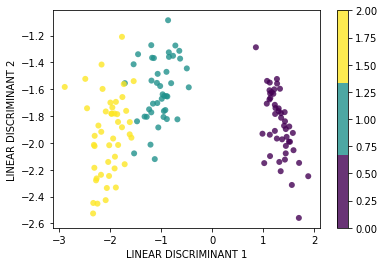

In [10]:
lda = LDA(2)
lda.fit(X_train,y_train)
X_proj = lda.transform(X_train)
print("SHAPE OF X:", X.shape)
print("AFTER TRANSFORMATION X:", X_proj.shape)

x1 = X_proj[:, 0]
x2 = X_proj[:, 1]

plt.scatter(x1, x2,
           c=y_train, edgecolor='none',alpha=0.8,
           cmap=plt.cm.get_cmap('viridis',3))

plt.xlabel('LINEAR DISCRIMINANT 1')
plt.ylabel('LINEAR DISCRIMINANT 2')
plt.colorbar()
plt.show()

In [11]:
X_test_proj = lda.transform(X_test)
model = LogisticRegression()
model.fit(X_proj,y_train)

LogisticRegression()

In [12]:
predictions = model.predict(X_test_proj)
accuracy = np.sum(predictions == y_test)/len(y_test)
print(accuracy)

1.0
